# 3. Базовые статистические модели

In [1]:
# Import the libraries
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as sts
%matplotlib inline

# Нормальное распределение

Сгенерируем выборку объёма 200 из стандартного нормального распределения (с $\mu=2$ и $\sigma^2=1$):

In [41]:
norm_rv = sts.norm(2, 1)
sample = norm_rv.rvs(200)

Гистограмма выборки:

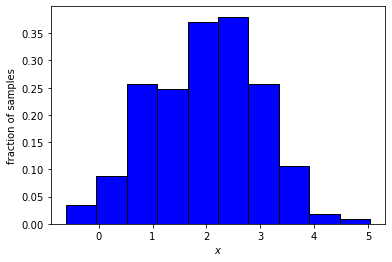

In [42]:
plt.hist(sample, color = 'blue', edgecolor = 'black', density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$');
plt.savefig('normal_distribution_hist_20', dpi = 200, transparent=True, bbox_inches = 'tight')

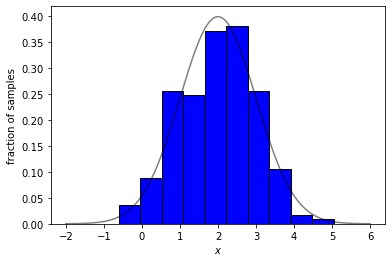

In [46]:
plt.hist(sample, color = 'blue', edgecolor = 'black', density=True)
plt.ylabel('fraction of samples')
plt.xlabel('$x$');

x = np.linspace(-2,6, 200)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, color = 'black', label='theoretical pdf', alpha=0.5)
plt.savefig('normal_distribution_hist', dpi = 200, transparent=True, bbox_inches = 'tight')

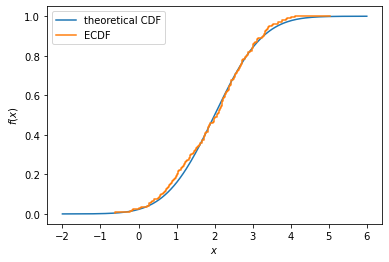

In [44]:
x = np.linspace(-2, 6, 200)
cdf = norm_rv.cdf(x)
plt.plot(x, cdf, label='theoretical CDF')

# для построения ECDF используем библиотеку statsmodels
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left');
plt.savefig('normal_distribution_CDF', dpi = 200, transparent=True, bbox_inches = 'tight')

Эмпирическая оценка плотности, построенная по выборке с помощью ядерного сглаживания:

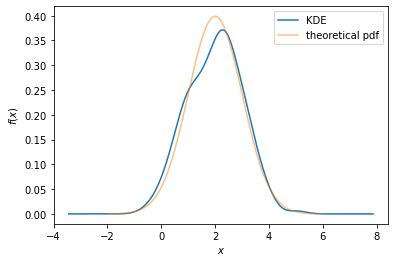

In [47]:
df = pd.DataFrame(sample, columns=['KDE'])
ax = df.plot(kind='density')

# на том же графике построим теоретическую плотность распределения:
x = np.linspace(-2,6,200)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.5)
plt.legend()
plt.ylabel('$f(x)$');
plt.xlabel('$x$');
plt.savefig('normal_distribution_KDE', dpi = 200, transparent=True, bbox_inches = 'tight')

Найдём основные числовые характеристики для выборки, сгенерированной из распределения $N(2, 1)$ 

In [52]:
df.describe()

,KDE
count,200.000000
mean,1.983755
std,1.003292
min,-0.610585
25%,1.217564
50%,2.083833
75%,2.685863
max,5.042073


Находим **MAD**

In [53]:
(df - df.median()).abs().median()

KDE    0.726644
dtype: float64

In [7]:
#создание DataFrame (df) с помощью чтения данных из файла
df_speed = pd.read_excel('speed_of_light.xlsx')

Найдём основные числовые характеристики

In [8]:
df_speed.describe()

,speed
count,100.000000
mean,852.400000
std,79.010548
min,620.000000
25%,807.500000
50%,850.000000
75%,892.500000
max,1070.000000


In [54]:
df = pd.read_excel('inter_failure_times.xlsx')

In [55]:
df.describe()

,time
count,135.000000
mean,656.881481
std,1037.299379
min,0.000000
25%,84.500000
50%,290.000000
75%,835.500000
max,6150.000000


In [105]:
poisson_rv = sts.poisson(0.0015)
poisson_rv.rvs(1000);

Text(0.5, 0, '$x$')

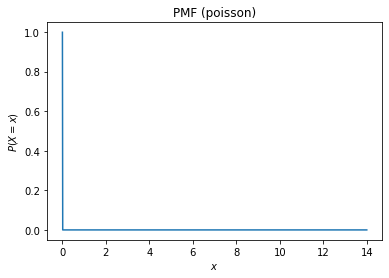

In [106]:
x = np.linspace(0, 14, 1000)
rv = sts.poisson(0.0015)
pmf = rv.pmf(x)
plt.plot(x, pmf)
plt.title("PMF (poisson)")

plt.ylabel('$P(X=x)$')
plt.xlabel('$x$')

# Домашняя работа

## 1. [# 30] На станции лондонского метро подсчитывалось количество женщин в каждой из 100 очередей длиной 10. Таким образом, был получен набор данных x1, x2, … , x100, где xi обозначает наблюдаемое количество женщин в i-й очереди. Набор данных представлен в таблице

In [2]:
df = pd.read_excel('women.xlsx')['count']

med = df.median()
print(med)

FileNotFoundError: [Errno 2] No such file or directory: 'women.xlsx'

In [ ]:
n = 1000
bootstrap_median = []
for _ in range(n):
    bootstrap_df = df.sample(len(df), replace=True)
    bootstrap_median.append(bootstrap_df.median() - med)